# Homework 4: Classification using sklearn  

The objective of this homework is to gain experience with using sklearn, a versatile Python toolbox for machine learning. The following code is copied from http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py. You should be able to run the code without error messages.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


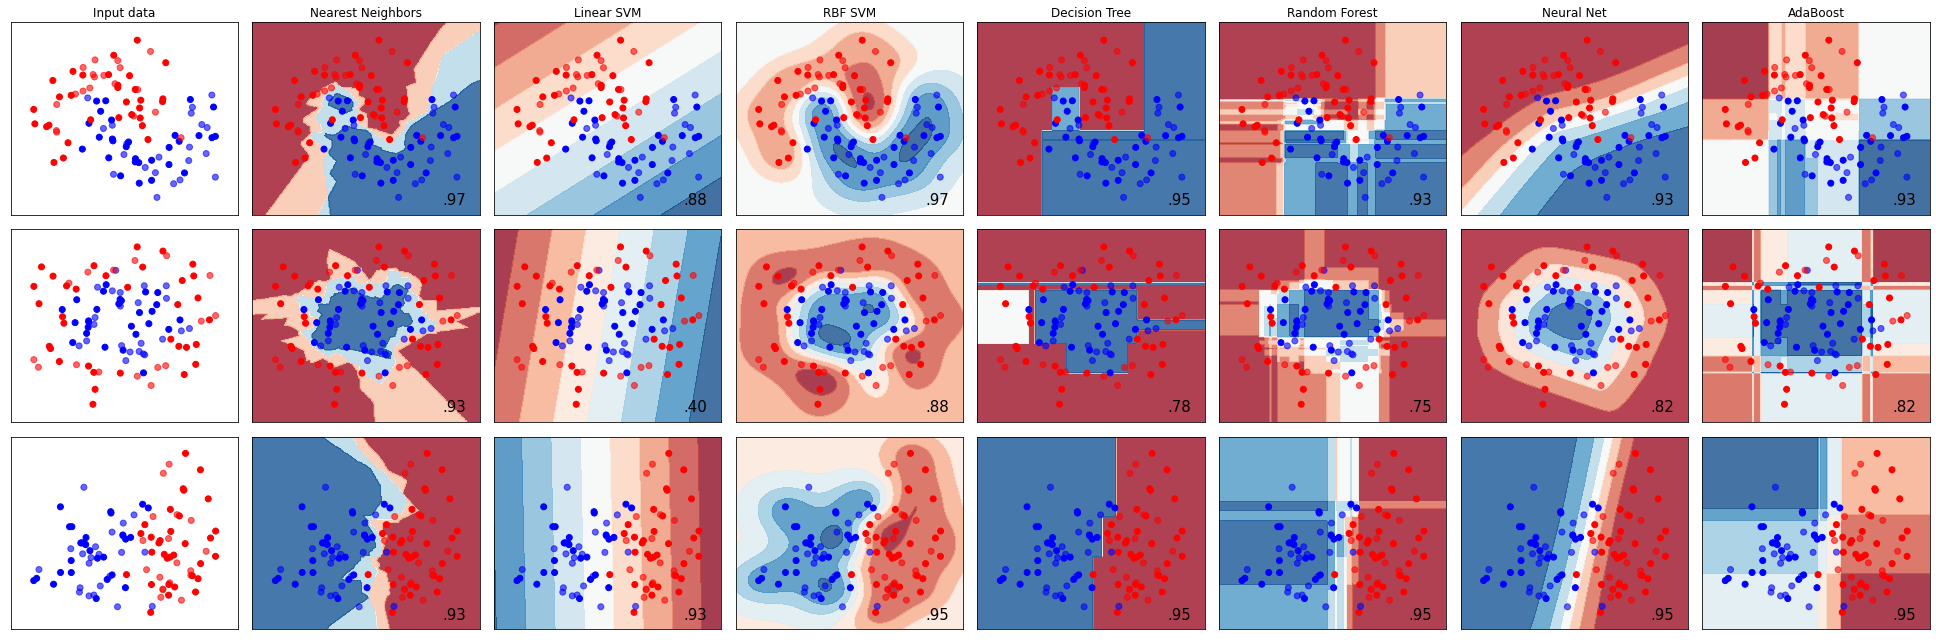

In [1]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

The code above trained several types of classifiers on 3 synthetic data sets. Among them are kNN and feedforward neural networks. There are also some other algorithms we will introduce during the course. At the moment, you do not have to worry what they are and how they work. 

**Question 1**. Study the code and try to understand what each line does. In particular, pay attention to how easy it is to train predictors of different types. Run the code. You should be able to see a nice display demonstrating performance of different algorithms on 3 data sets.

**Question 2**. Train all the listed classifiers on Iris data (you can load it using *iris = sklearn.datasets.load_iris()*) and test their accuracy. Report and discuss the results

**Question 3**. Play with the hyperparameters of each of the algorithms. Try to improve the accuracy on the test data. 

**Question 4**. Perform the exploratory data analysis of  the Adult Data Set from http://archive.ics.uci.edu/ml/datasets/Adult. Train and estimate accuracy of all of all the classifiers from Question 1. Note that you will have to preprocess your data set before training. Explain all the preprocessing steps you applied and report on the accuracy on test data. Report all EDA and classification results in a 1-page document.


## Answer 1
To try and understand the code above, I decided I needed to use it with the iris data. I found that this code is meant for binomial data, as well as only two features, so I trained each ML model on the sepal length and sepal width for versicolor and viriginca flowers. The best model to decide between the two seemed to be the decision tree!

In [2]:
iris = sklearn.datasets.load_iris()
print(iris.keys())
print(iris.target_names)
pd.DataFrame(iris['data'], columns=iris.feature_names, index=iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3


In [3]:
len(iris.data.T[0])
iris_df = pd.DataFrame(iris.data, iris.target, columns=iris.feature_names)
iris_df_binom = iris_df[iris_df.index.isin([1, 2])]
iris_df_binom

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
1,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
1,6.9,3.1,4.9,1.5
1,5.5,2.3,4.0,1.3
1,6.5,2.8,4.6,1.5
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3


In [4]:
first = 0
X, y = iris_df_binom.iloc[:,first:first+2], iris_df_binom.index
iris_df_binom.iloc[:,first:first+2]

,sepal length (cm),sepal width (cm)
1,7.0,3.2
1,6.4,3.2
1,6.9,3.1
1,5.5,2.3
1,6.5,2.8
...,...,...
2,6.7,3.0
2,6.3,2.5
2,6.5,3.0
2,6.2,3.4


[0. 0. 0. ... 1. 1. 1.]
[-1.51175606 -1.49147591 -1.47119576 ...  2.32159213  2.34187228
  2.36215243]
[0.26012468 0.25960229 0.25905086 ... 0.59790652 0.57090786 0.54344084]
[0. 0. 0. ... 1. 1. 1.]
[0.04 0.04 0.04 ... 1.   1.   1.  ]
[0.1651609  0.16803235 0.1709435  ... 0.97591359 0.97692792 0.97787781]
[-0.52965141 -0.52965141 -0.52965141 ...  1.50409131  1.50409131
  1.50409131]


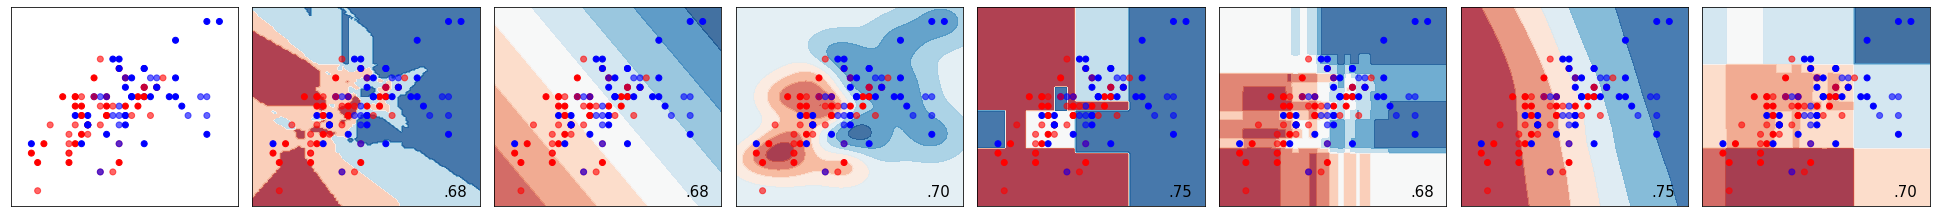

In [5]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

h = .05  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]



figure = plt.figure(figsize=(27, 9))
i = 1
# preprocess dataset, split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
if ds_cnt == 0:
    ax.set_title("Input data")
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    print(Z)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

## Answer 2
After training on the entire iris data with all 7 classifiers in the list, I saw that there was some variation between test/train splits. To semi-fix this, I just did 100 test/train splits and trained/tested each model 100 times, and then looked at the average of the scores. Although all of the models were able to pick the right flower species >90% of the time, the Neural Network seemed to have the highest average accuracy of 0.966667 at the time of running this program. However, the model with the lowest standard deviation in scores at runtime was the RBF SVM, so this model may be more reliable in it's predictive power. This is shown with the violin/stripplot combination.

In [6]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
0,4.7,3.2,1.3,0.2
0,4.6,3.1,1.5,0.2
0,5.0,3.6,1.4,0.2
...,...,...,...,...
2,6.7,3.0,5.2,2.3
2,6.3,2.5,5.0,1.9
2,6.5,3.0,5.2,2.0
2,6.2,3.4,5.4,2.3


In [40]:
X, y = np.array(iris_df.copy()), np.array(iris_df.index)
splits = []
for x in range(100):
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=x)
    splits.append((X_train, X_test, y_train, y_test))

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]
scores = {}
for X_train, X_test, y_train, y_test in splits:
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        if name in scores.keys():
            scores[name].append(score)
        else:
            scores[name] = [score]

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

Nearest Neighbors    0.957000
Linear SVM           0.916833
RBF SVM              0.960167
Decision Tree        0.946500
Random Forest        0.944000
Neural Net           0.966667
AdaBoost             0.938667
dtype: float64

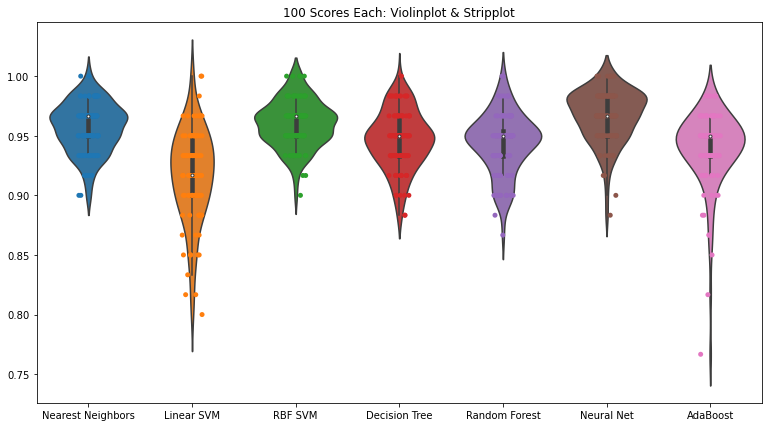

In [73]:
scores_df = pd.DataFrame(scores)
average_scores = scores_df.sum()/len(scores_df)
plt.figure(figsize=(13,7))
plt.title("100 Scores Each: Violinplot & Stripplot")

sns.stripplot(data=scores_df)
sns.violinplot(data=scores_df)
average_scores

## Answer 3
I decided to move forward with the MLPClassifier (Neural Network). To do hyperparameter tuning, I used `sklearn`'s `GridSearchCV`. The parameters I tuned were `hidden_layer_sizes`, `activation`, `alpha`, and `learning_rate`. Surprisingly enough, the best parameters at runtime were as follows:
* 'activation': 'identity',
* 'alpha': 0.0001,
* 'hidden_layer_sizes': 90,
* 'learning_rate': 'invscaling'


In [75]:
from sklearn.model_selection import GridSearchCV

In [81]:
X, y = np.array(iris_df.copy()), np.array(iris_df.index)
parameters = {
    'hidden_layer_sizes':[(100), (90), (80)],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'alpha':[0.0001, 0.001, 0.01, 0.1, 1],
    'learning_rate':['constant', 'invscaling', 'adaptive']
}
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=x)

mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameters)
clf.fit(X_train, y_train)

C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Josh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [100, 90, 80],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']})

In [95]:
print(clf.score(X_test, y_test))
clf.best_params_

0.9666666666666667


{'activation': 'identity',
 'alpha': 0.0001,
 'hidden_layer_sizes': 90,
 'learning_rate': 'invscaling'}

## Answer 4